In [100]:
# imports
import panel as pn
import dash
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv, find_dotenv
import plotnine as p9
import warnings
from scipy import linalg, optimize
warnings.filterwarnings('ignore')
%matplotlib inline

In [101]:
# Load .env enviroment variables (find_dotenv is required on my computer)
load_dotenv(find_dotenv('api_keys.env'))
map_box_api = os.getenv("MAPBOX_API_KEY")

In [102]:
# Create path and dataframe
cocoa_production_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'cocoa-bean-production.csv')
production_df = pd.read_csv(cocoa_production_path, infer_datetime_format=True, parse_dates=True)
production_df = production_df.set_index(['Entity', 'Year'])
production_df = production_df.drop(columns=('Code'))
production_df

Crops (tonnes)
Entity        Year                 
Cameroon      2010           264077
              2011           240000
              2012           268941
              2013           275000
              2014           271297
              2015           274939
              2016           293169
              2017           300511
              2018           307867
Cote d'Ivoire 2010          1301347
              2011          1511255
              2012          1485882
              2013          1448992
              2014          1617841
              2015          1796000
              2016          1634000
              2017          2034000
              2018          1963949
Ecuador       2010           132099
              2011           224163
              2012           133323
              2013           128446
              2014           156216
              2015           180192
              2016           177551
              2017           205955
              2018           235182
Ghana         2010           632037
              2011           700020
              2012           879348
              2013           835466
              2014           858720
              2015           858720
              2016           858720
              2017           893598
              2018           947632
Nigeria       2010           399200
              2011           391000
              2012           383000
              2013           367000
              2014           329870
              2015           302066
              2016           298029
              2017           324391
              2018           332927

<AxesSubplot:title={'center':'Crop Production Data by Country and Year'}, xlabel='Entity,Year', ylabel='Production in Tonnes by Million'>

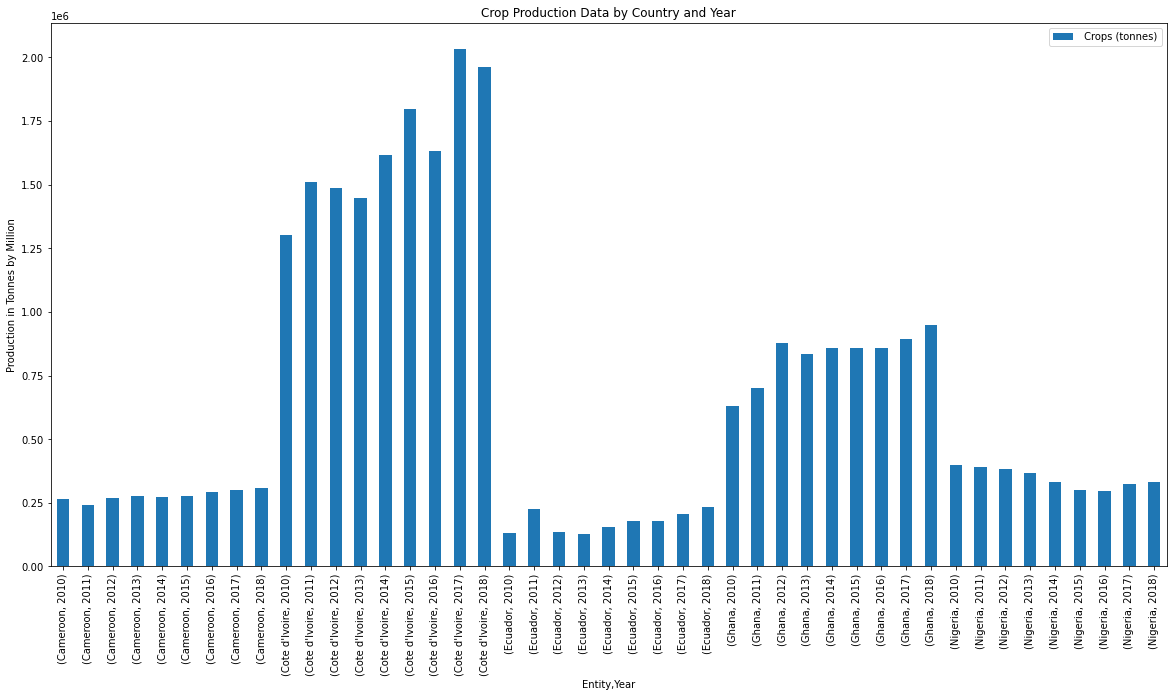

In [103]:
# Plot whole dataframe
production_df_plot = production_df.plot(kind='bar', figsize=(20,10), title='Crop Production Data by Country and Year',
                  ylabel='Production in Tonnes by Million')
production_df_plot

In [104]:
# Create second dataframe with only Year as the index
production_df2 = pd.read_csv(cocoa_production_path, infer_datetime_format=True, parse_dates=True)
production_df2 = production_df2.set_index(['Year'])
production_df2 = production_df2.drop(columns=('Code'))

# Determine mean
production_mean = production_df2.groupby(by=['Year'], dropna=False).mean()
production_mean

Crops (tonnes)
Year                 
2010       545,752.00
2011       613,287.60
2012       630,098.80
2013       610,980.80
2014       646,788.80
2015       682,383.40
2016       652,293.80
2017       751,691.00
2018       757,511.40

<AxesSubplot:title={'center':'Average Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

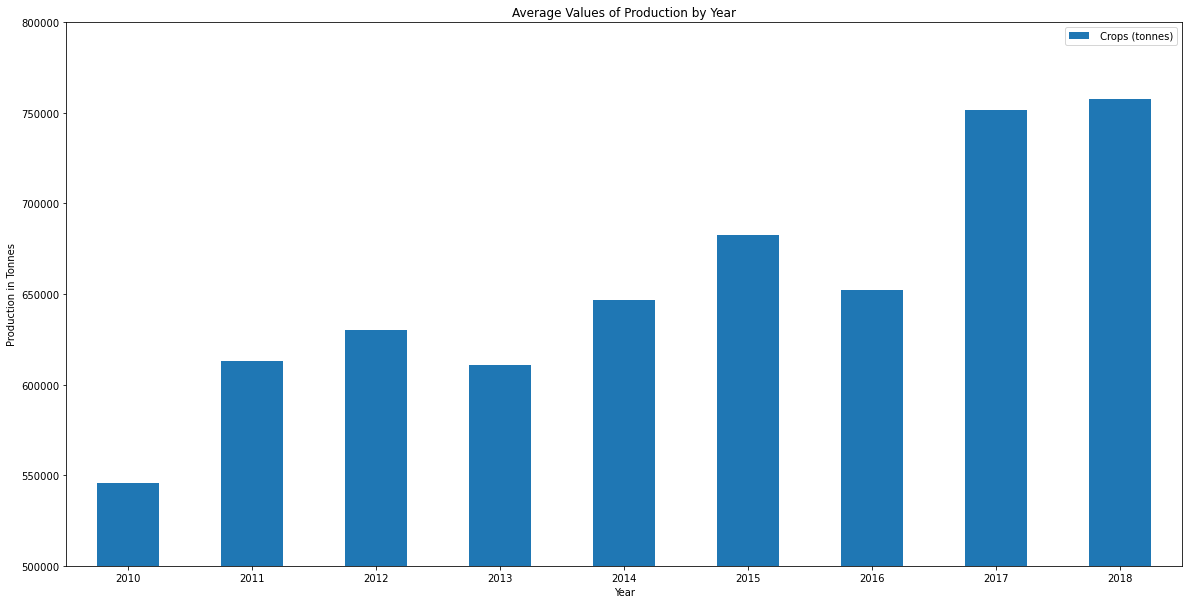

In [105]:
# Plot production mean
production_mean_plot = production_mean.plot(kind='bar', figsize=(20,10), title='Average Values of Production by Year',
                                           rot=0, ylabel='Production in Tonnes',
                                           ylim=(500000, 800000))
production_mean_plot

In [106]:
# Determine min, max, std
production_min = production_df2.groupby(by=['Year']).min()
production_min = production_min.drop(columns=('Entity'))
production_max = production_df2.groupby(by=['Year']).max()
production_max = production_max.drop(columns=('Entity'))
production_std = production_df2.groupby(by=['Year']).std()

In [107]:
# Check min values
production_min

Crops (tonnes)
Year                 
2010           132099
2011           224163
2012           133323
2013           128446
2014           156216
2015           180192
2016           177551
2017           205955
2018           235182

<AxesSubplot:title={'center':'Minimum Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

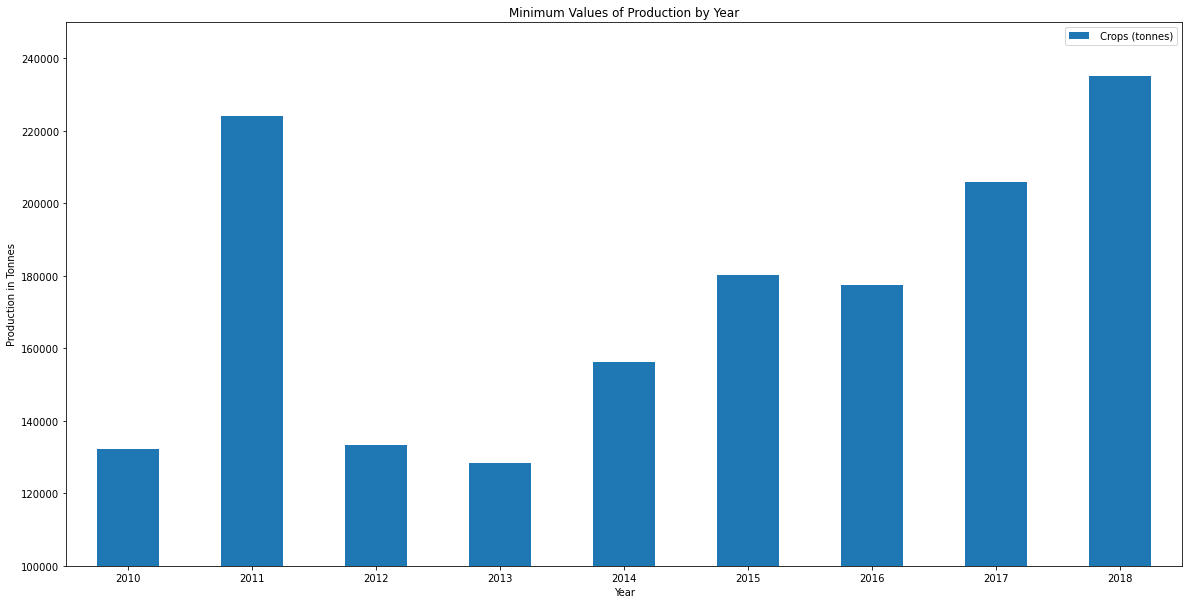

In [108]:
# Plot min values
production_min_plot = production_min.plot(kind='bar', figsize=(20,10), 
                                          title='Minimum Values of Production by Year',
                                         rot=0, ylabel='Production in Tonnes',
                                         ylim=(100000, 250000))
production_min_plot

In [109]:
# Check max values
production_max

Crops (tonnes)
Year                 
2010          1301347
2011          1511255
2012          1485882
2013          1448992
2014          1617841
2015          1796000
2016          1634000
2017          2034000
2018          1963949

<AxesSubplot:title={'center':'Max Values of Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

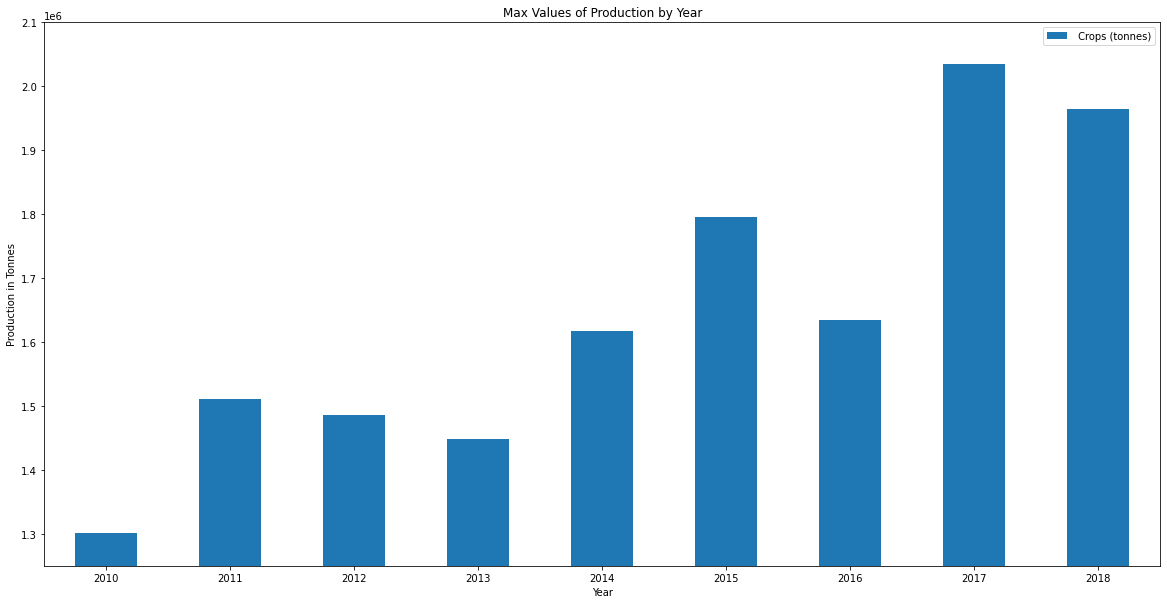

In [110]:
# Plot max values
production_max_plot = production_max.plot(kind='bar', figsize=(20,10), 
                                         title='Max Values of Production by Year',
                                         rot=0, ylabel='Production in Tonnes',
                                         ylim=(1250000, 2100000))
production_max_plot

In [111]:
# Check std values, ensure float is set to two decimals
pd.options.display.float_format = "{:,.2f}".format
production_std

Crops (tonnes)
Year                 
2010       461,057.48
2011       537,131.58
2012       555,150.66
2013       538,030.19
2014       606,207.58
2015       677,141.97
2016       609,551.83
2017       766,229.47
2018       732,618.17

<AxesSubplot:title={'center':'Standard Deviation in Production by Year'}, xlabel='Year', ylabel='Production in Tonnes'>

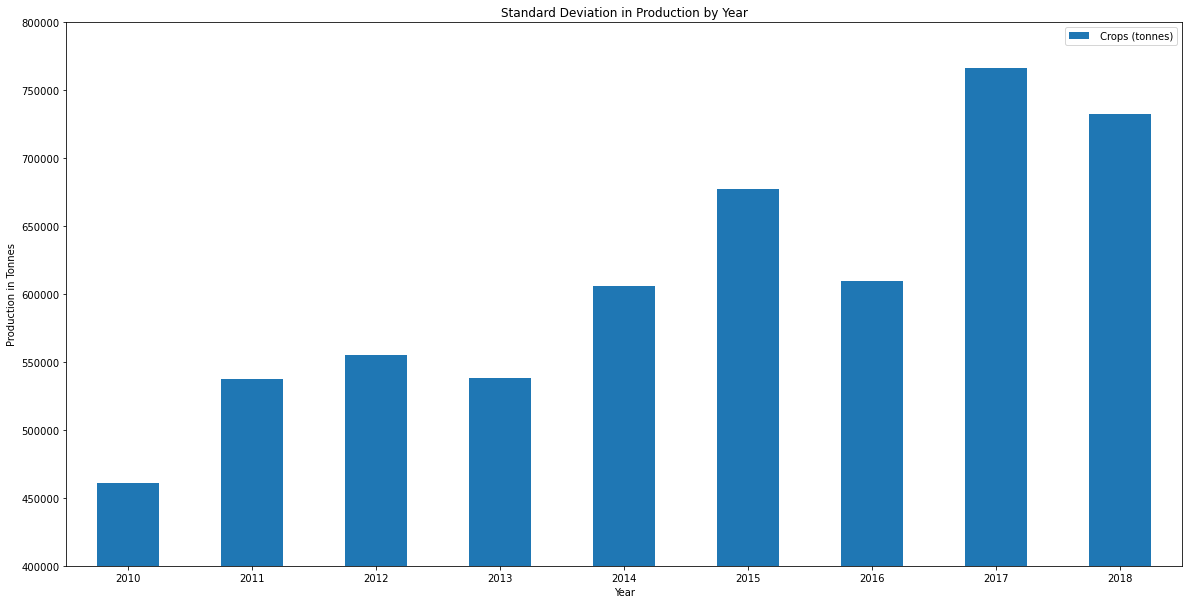

In [112]:
# Plot std values
production_std_plot = production_std.plot(kind='bar', figsize=(20,10),
                                          title='Standard Deviation in Production by Year',
                                          rot=0, ylabel='Production in Tonnes',
                                         ylim=(400000, 800000))
production_std_plot

In [113]:
area_path = Path('/Users', 'tylerhubbard', 'umnfintech', 'project1_group3', 'Resources', 'fao_area.csv')
fao_area = pd.read_csv(area_path, index_col=['Area', 'Year'])
fao_area = fao_area.drop(columns=['Domain Code', 'Domain', 'Area Code (FAO)', 'Element Code', 'Item Code (FAO)',
                                  'Item', 'Year Code', 'Flag', 'Flag Description', 'Element', 'Unit'])
fao_area

Value
Area          Year         
Cameroon      2010   670000
              2011   670000
              2012   670000
              2013   670000
              2014   714261
              2015   767555
              2016   520947
              2017   599844
              2018   606649
Côte d'Ivoire 2010  2278786
              2011  2685121
              2012  2746080
              2013  2731411
              2014  3084498
              2015  3458163
              2016  3168749
              2017  4035466
              2018  4359104
Ecuador       2010   360025
              2011   399467
              2012   390176
              2013   402434
              2014   372637
              2015   432094
              2016   454257
              2017   467327
              2018   501950
Ghana         2010  1600200
              2011  1600300
              2012  1600300
              2013  1600300
              2014  1683765
              2015  1683765
              2016  1683765
              2017  1867648
              2018  1707146
Nigeria       2010  1272430
              2011  1241329
              2012  1266347
              2013  1239750
              2014  1144659
              2015  1056893
              2016  1048945
              2017  1154654
              2018  1222844

<AxesSubplot:title={'center':'Area Harvested (in million ha) by Area and Year from 2010-2018'}, xlabel='Area,Year', ylabel='Area in millions of ha'>

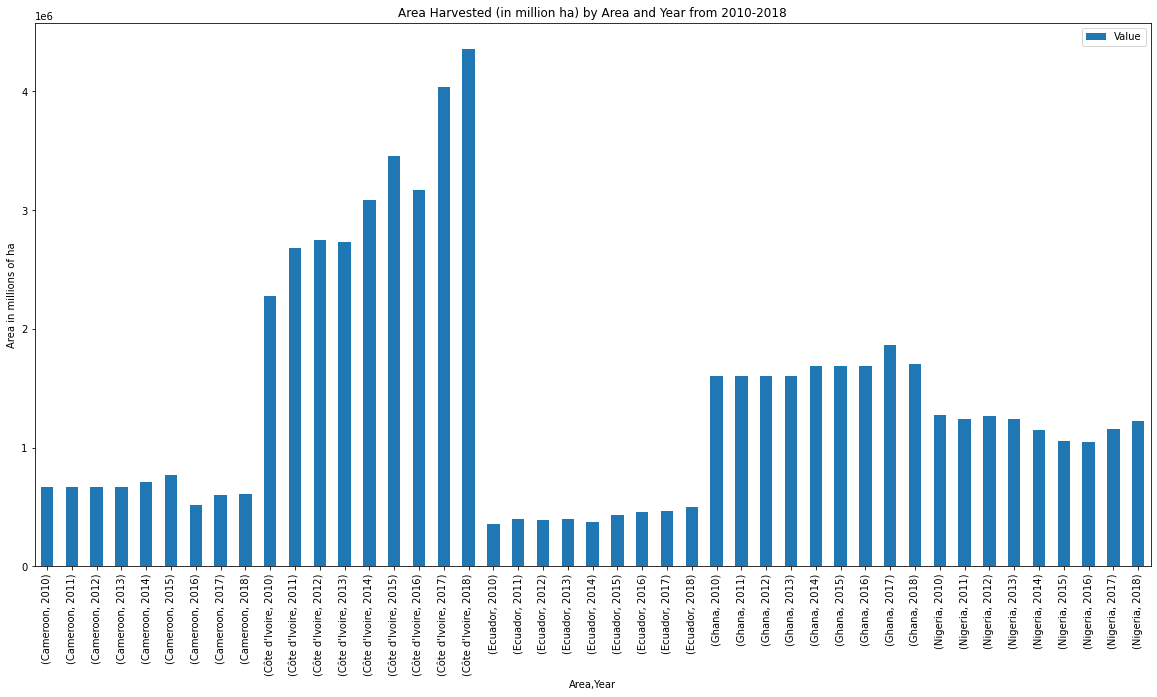

In [114]:
fao_area.plot(kind='bar', figsize=(20,10), title='Area Harvested (in million ha) by Area and Year from 2010-2018',
             ylabel='Area in millions of ha')

In [115]:
area_harvested_mean = fao_area.groupby(by=['Year'], dropna=False).mean()
area_harvested_min = fao_area.groupby(by=['Year'], dropna=False).min()
area_harvested_max = fao_area.groupby(by=['Year'], dropna=False).max()
area_harvested_std = fao_area.groupby(by=['Year'], dropna=False).std()

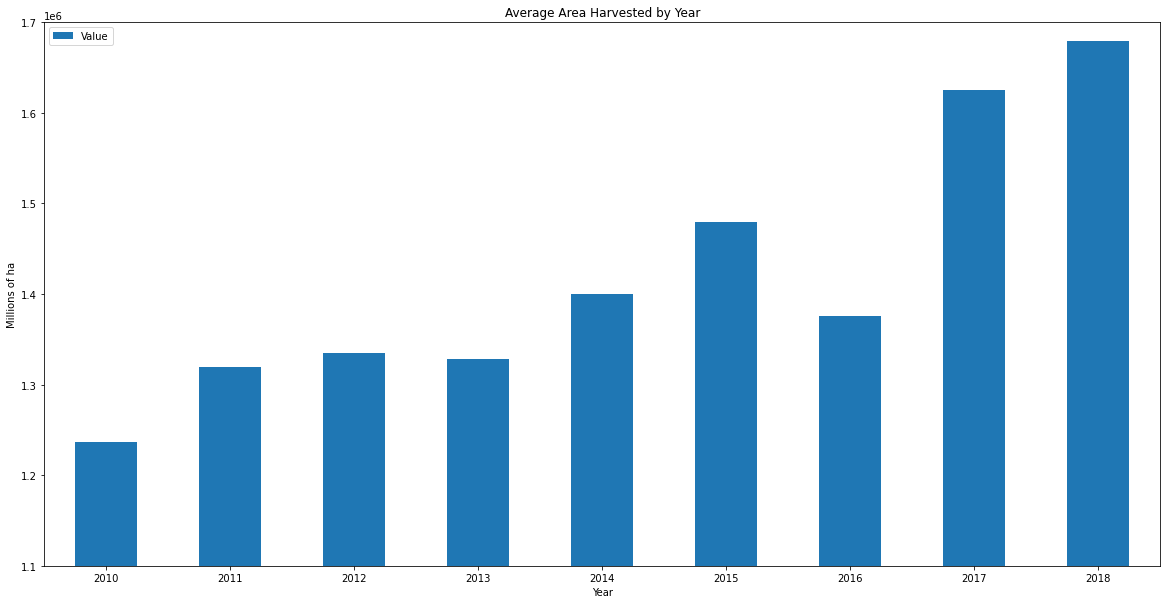

In [116]:
area_harvested_mean_plot = area_harvested_mean.plot(kind='bar', figsize=(20,10), ylim=(1100000, 1700000),
                                                   title='Average Area Harvested by Year', ylabel='Millions of ha',
                                                   rot=0)

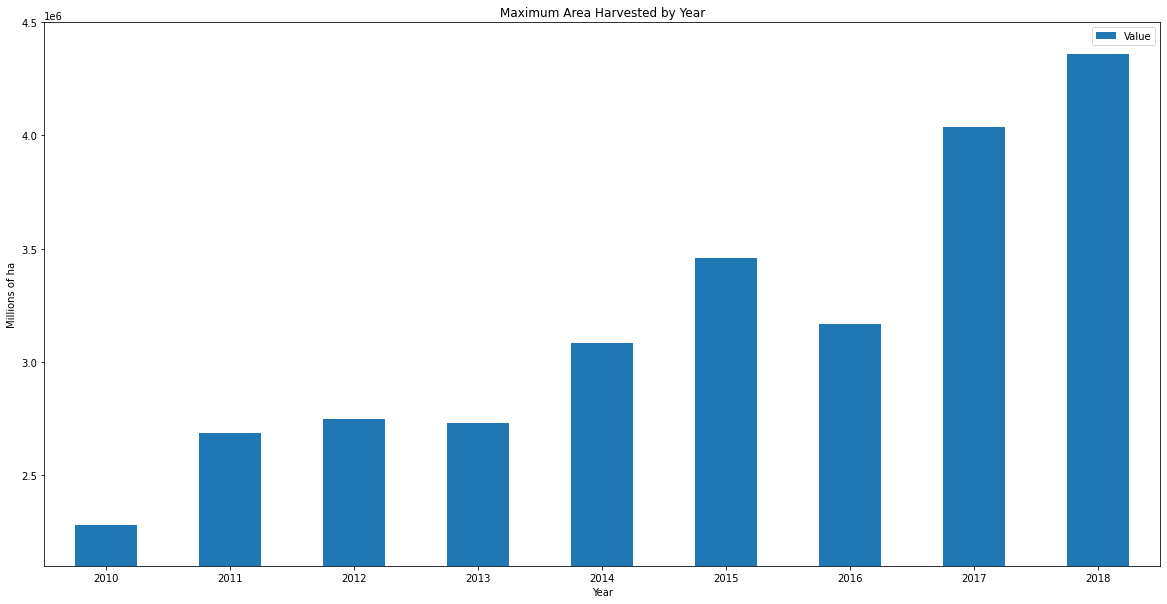

In [117]:
area_harvested_max_plot = area_harvested_max.plot(kind='bar', figsize=(20,10), title='Maximum Area Harvested by Year',
                                                 ylim=(2100000, 4500000), rot=0, ylabel='Millions of ha')

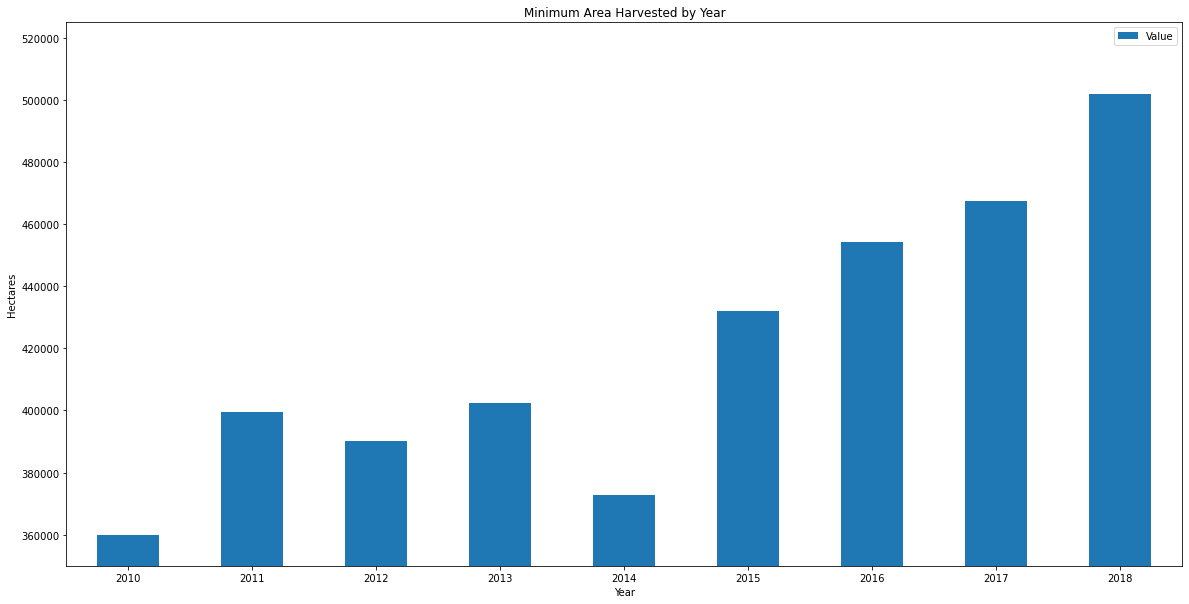

In [118]:
area_harvested_min_plot = area_harvested_min.plot(kind='bar', figsize=(20,10), rot=0,
                                                  title='Minimum Area Harvested by Year', ylabel='Hectares',
                                                  ylim=(350000, 525000))

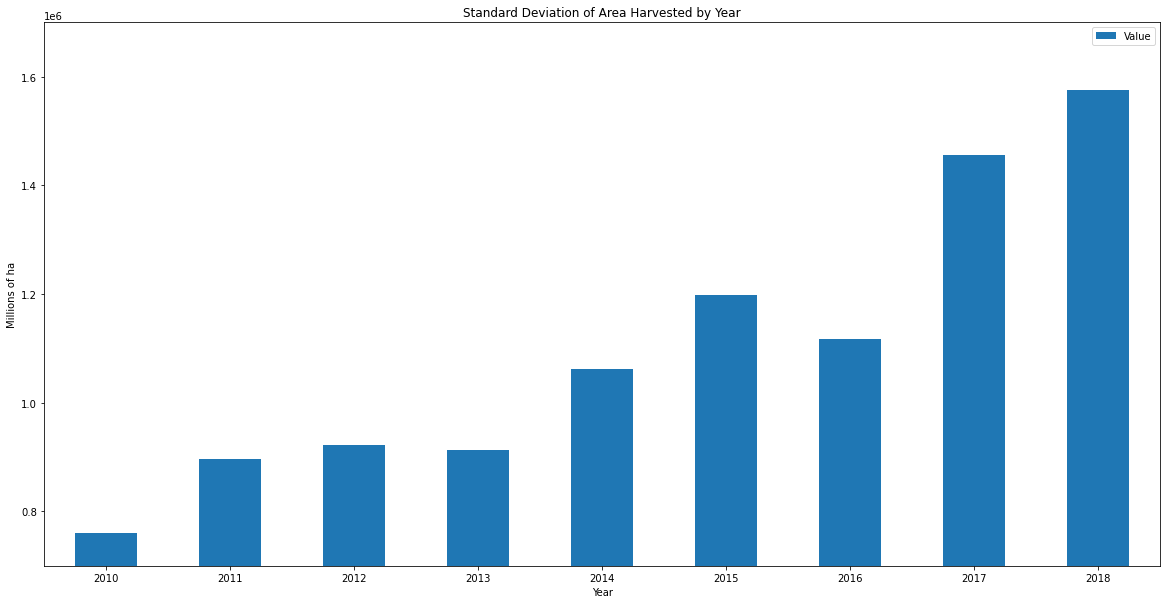

In [119]:
area_harvested_std_plot = area_harvested_std.plot(kind='bar', figsize=(20,10), rot=0, ylabel='Millions of ha',
                                                  title='Standard Deviation of Area Harvested by Year',
                                                  ylim=(700000, 1700000))